In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
file1 = "Resources/Hot 100 Audio Features.csv"
file2 = "Resources/Hot Stuff.csv"

audio_features = pd.read_csv(file1)
hot100 = pd.read_csv(file2)

merge_df = pd.merge(audio_features, hot100, on=["Song", "Performer", "SongID"], how="outer")

merge_df = merge_df.drop(["SongID", "spotify_track_id", "spotify_track_preview_url",
                         "spotify_track_album", "spotify_track_explicit", "time_signature",
                        "url", "key", "mode", "acousticness", "liveness", "valence", "spotify_genre"], axis=1)
#merge_df = merge_df.fillna(0)
merge_df.head()

new_df = merge_df.set_index(["Performer"])
new_df.reset_index()
new_df.head()

,Song,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,loudness,speechiness,instrumentalness,tempo,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
Performer,,,,,,,,,,,,,,,
"Tainy, Anuel AA & Ozuna",Adicto,270740.0,91.0,0.734,0.836,-4.803,0.0735,0.000016,80.002,10/5/2019,86.0,1.0,NaN,86.0,1.0
"Tainy, Anuel AA & Ozuna",Adicto,270740.0,91.0,0.734,0.836,-4.803,0.0735,0.000016,80.002,10/12/2019,98.0,1.0,86.0,86.0,2.0
Justin Moore,The Ones That Didn't Make It Back Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/29/2019,100.0,1.0,NaN,100.0,1.0
Justin Moore,The Ones That Didn't Make It Back Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/6/2019,93.0,1.0,100.0,93.0,2.0
Justin Moore,The Ones That Didn't Make It Back Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/13/2019,95.0,1.0,93.0,93.0,3.0


In [3]:
#merge_df["spotify_genre"].value_counts()
#new_df = merge_df[["Performer", "Song", "spotify_genre"]]

#new_df = new_df.set_index(["Performer", "Song"])
#newnew_df = new_df["spotify_genre"].str.split(pat=",", expand=True)
#newnew_df.reset_index().head()

In [4]:
new_df = new_df[["Song", "spotify_track_duration_ms", "tempo", 
                 "WeekID", "Week Position", "Peak Position", "Weeks on Chart"]]
new_df = new_df.dropna(how="any")
new_df

,Song,spotify_track_duration_ms,tempo,WeekID,Week Position,Peak Position,Weeks on Chart
Performer,,,,,,,
"Tainy, Anuel AA & Ozuna",Adicto,270740.0,80.002,10/5/2019,86.0,86.0,1.0
"Tainy, Anuel AA & Ozuna",Adicto,270740.0,80.002,10/12/2019,98.0,86.0,2.0
Lady Gaga & Bradley Cooper,Shallow,215733.0,95.799,10/13/2018,28.0,28.0,1.0
Lady Gaga & Bradley Cooper,Shallow,215733.0,95.799,12/1/2018,23.0,5.0,8.0
Lady Gaga & Bradley Cooper,Shallow,215733.0,95.799,2/2/2019,24.0,5.0,17.0
...,...,...,...,...,...,...,...
Solomon Burke,Tonight's The Night,161186.0,173.305,7/3/1965,32.0,32.0,6.0
Solomon Burke,Tonight's The Night,161186.0,173.305,7/10/1965,29.0,29.0,7.0
Solomon Burke,Tonight's The Night,161186.0,173.305,7/17/1965,28.0,28.0,8.0


In [5]:
new_df = new_df.rename(columns= {"spotify_track_duration_ms": "Length", "WeekID": "Date", "tempo": "Tempo"})
new_df.head()

,Song,Length,Tempo,Date,Week Position,Peak Position,Weeks on Chart
Performer,,,,,,,
"Tainy, Anuel AA & Ozuna",Adicto,270740.0,80.002,10/5/2019,86.0,86.0,1.0
"Tainy, Anuel AA & Ozuna",Adicto,270740.0,80.002,10/12/2019,98.0,86.0,2.0
Lady Gaga & Bradley Cooper,Shallow,215733.0,95.799,10/13/2018,28.0,28.0,1.0
Lady Gaga & Bradley Cooper,Shallow,215733.0,95.799,12/1/2018,23.0,5.0,8.0
Lady Gaga & Bradley Cooper,Shallow,215733.0,95.799,2/2/2019,24.0,5.0,17.0


In [6]:
new_df.dtypes
#data types are appropriate (thank God)

Song               object
Length            float64
Tempo             float64
Date               object
Week Position     float64
Peak Position     float64
Weeks on Chart    float64
dtype: object

In [7]:
new_df.describe()
#tempo min: 0, max: 241, 25: 99, 50: 119, 75: 136- for bin reference

,Length,Tempo,Week Position,Peak Position,Weeks on Chart
count,2.800390e+05,280039.000000,280039.000000,280039.000000,280039.000000
mean,2.292466e+05,120.031451,49.559797,40.343195,9.364606
std,6.507021e+04,27.766977,28.767562,29.215515,7.625508
min,2.968800e+04,0.000000,1.000000,1.000000,1.000000
25%,1.894260e+05,99.058000,25.000000,13.000000,4.000000
50%,2.250000e+05,118.552000,49.000000,37.000000,8.000000
75%,2.597330e+05,135.946000,74.000000,65.000000,13.000000
max,3.079157e+06,241.009000,100.000000,100.000000,87.000000


In [47]:
peak_df = new_df.sort_values(by="Peak Position")
peak_df = peak_df.drop_duplicates(["Song"], keep="first")

def convert(x):
    return round((x/1000),0)

def rounding(x):
    return round(x,0)
    
peak_df["Length"] = peak_df["Length"].apply(convert)
peak_df["Tempo"] = peak_df["Tempo"].apply(rounding)

peak_df = peak_df.loc[(peak_df["Peak Position"] <= 40)]
peak_df

,Song,Length,Tempo,Date,Week Position,Peak Position,Weeks on Chart
Performer,,,,,,,
Exile,Kiss You All Over,214.0,102.0,12/2/1978,45.0,1.0,22.0
Commodores,Still,225.0,124.0,12/8/1979,3.0,1.0,11.0
The Notorious B.I.G. Featuring Puff Daddy & Mase,Mo Money Mo Problems,257.0,105.0,12/13/1997,26.0,1.0,20.0
Ashanti,Foolish,227.0,89.0,9/21/2002,49.0,1.0,32.0
Justin Bieber,Love Yourself,234.0,103.0,5/28/2016,11.0,1.0,26.0
...,...,...,...,...,...,...,...
Post Malone,92 Explorer,211.0,146.0,5/12/2018,40.0,40.0,1.0
Elvis Presley,Blue Christmas,129.0,95.0,1/5/2019,40.0,40.0,1.0
Elvis Presley,Until It's Time For You To Go,238.0,90.0,3/11/1972,40.0,40.0,7.0


In [48]:
def regress(x,y):
    import scipy.stats as st
    from scipy.stats import linregress
    corr = st.pearsonr(x, y)
    corr1 = corr[0]
    rsquare = round(corr1**2,6)
    print(f"The r-squared is: {rsquare}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    print(f"The regression line is: {line_eq}")

In [54]:
peak_df.describe()

,Length,Tempo,Week Position,Peak Position,Weeks on Chart
count,10056.000000,10056.000000,10056.000000,10056.000000,10056.00000
mean,223.719968,120.118636,35.242641,16.330151,12.98041
std,66.298614,27.611555,25.829241,12.020858,6.50570
min,30.000000,0.000000,1.000000,1.000000,1.00000
25%,177.000000,100.000000,15.000000,5.000000,9.00000
50%,220.000000,119.000000,31.000000,14.000000,12.00000
75%,257.000000,135.000000,48.000000,26.000000,16.00000
max,1561.000000,233.000000,100.000000,40.000000,84.00000


In [57]:
low = 177
high = 257
IQR = high - low
low2 = 100
high2 = 135
IQR2 = high2 - low2

lowout = low - (1.5*IQR)
highout = high + (1.5*IQR)
lowout2 = low2 - (1.5*IQR2)
highout2 = high2 + (1.5*IQR2)

print(f"{lowout} {highout} {lowout2} {highout2}")

peak_df = peak_df.loc[(peak_df["Length"] > 57) & (peak_df["Length"] < 377)]
peak_df = peak_df.loc[(peak_df["Tempo"] > 47) & (peak_df["Tempo"] < 187)]

57.0 377.0 47.5 187.5


The r-squared is: 0.001617
The regression line is: y = -0.18x + 222.09


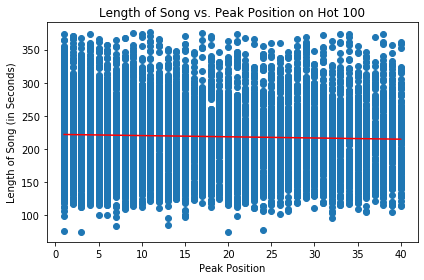

In [58]:
x_axis = peak_df["Peak Position"]
y_axis = peak_df["Length"]

plt.scatter(x_axis, y_axis)
plt.xlabel("Peak Position")
plt.ylabel("Length of Song (in Seconds)")
plt.title("Length of Song vs. Peak Position on Hot 100")
regress(x_axis, y_axis)
plt.tight_layout()
plt.savefig("Images/LenvsPeak.png")

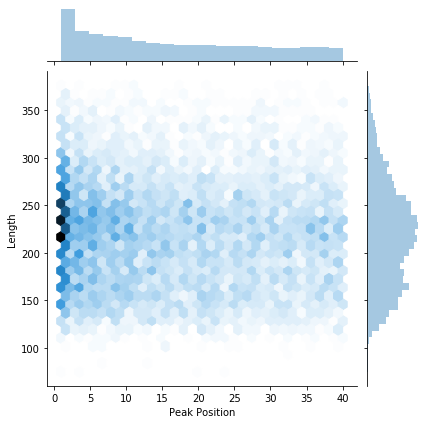

In [59]:
x = peak_df["Peak Position"]
y = peak_df["Length"]

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

#plt.imshow(heatmap.T, extent=extent, origin='lower')
sns.jointplot(x="Peak Position", y="Length", data=peak_df, kind="hex")
plt.savefig("Images/LenvsPeakheatmap.png")

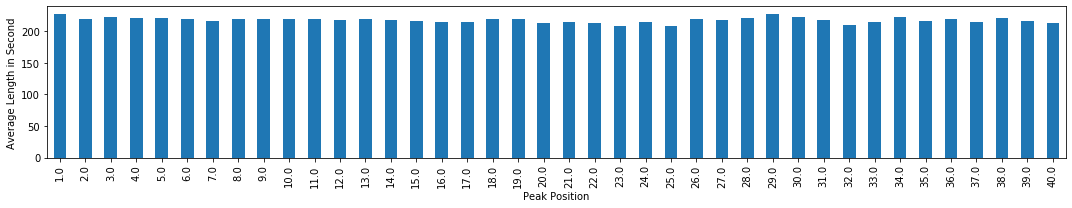

In [60]:
peak_df2 = peak_df.groupby(["Peak Position"])
avg = peak_df2["Length"].mean()

peakchart = avg.plot(kind="bar", figsize=(15,3))
peakchart.set_xlabel("Peak Position")
peakchart.set_ylabel("Average Length in Second")
plt.tight_layout()
plt.savefig("Images/LenvsPeakBar.png")

The r-squared is: 0.001181
The regression line is: y = 0.07x + 117.52


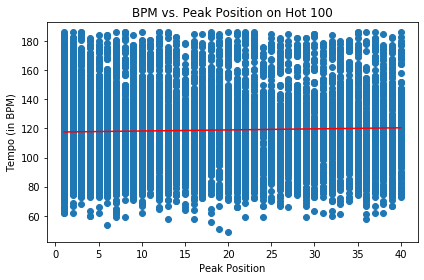

In [61]:
x_axis = peak_df["Peak Position"]
y_axis = peak_df["Tempo"]

plt.scatter(x_axis, y_axis)
plt.xlabel("Peak Position")
plt.ylabel("Tempo (in BPM)")
plt.title("BPM vs. Peak Position on Hot 100")
regress(x_axis, y_axis)
plt.tight_layout()
plt.savefig("Images/bpmvsPeak.png")

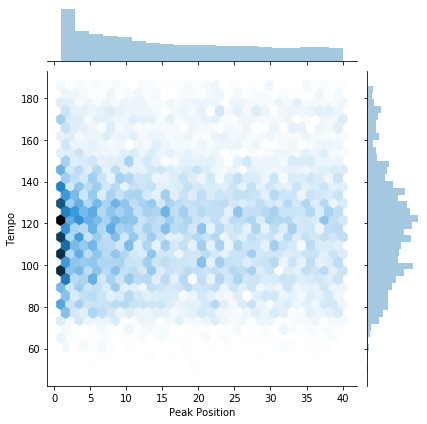

In [62]:
x = peak_df["Peak Position"]
y = peak_df["Tempo"]

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

#plt.imshow(heatmap.T, extent=extent, origin='lower')
sns.jointplot(x="Peak Position", y="Tempo", data=peak_df, kind="hex")
plt.savefig("Images/BPMvsPeakheatmap.png")

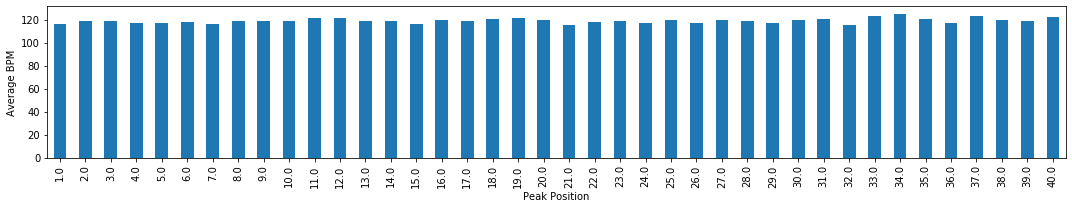

In [63]:
avg2 = peak_df2["Tempo"].mean()

peakchart2 = avg2.plot(kind="bar", figsize=(15,3))
peakchart2.set_xlabel("Peak Position")
peakchart2.set_ylabel("Average BPM")
plt.tight_layout()
plt.savefig("Images/bpmvsPeakBar.png")

In [16]:
time_df = new_df.loc[(new_df["Peak Position"] <= 40)]
time_df = time_df.sort_values(by="Weeks on Chart")
time_df = time_df.drop_duplicates(["Song"], keep="last")
    
time_df["Length"] = time_df["Length"].apply(convert)
time_df["Tempo"] = time_df["Tempo"].apply(rounding)

time_df = time_df.loc[(time_df["Weeks on Chart"] <= 52)]

time_df

,Song,Length,Tempo,Date,Week Position,Peak Position,Weeks on Chart
Performer,,,,,,,
Lil Uzi Vert,Futsal Shuffle 2020,199.0,137.0,12/28/2019,5.0,5.0,1.0
Jordan Smith,Mary Did You Know,200.0,103.0,1/2/2016,24.0,24.0,1.0
5 Seconds Of Summer,Everything I Didn't Say,180.0,175.0,8/2/2014,24.0,24.0,1.0
PSY Featuring Snoop Dogg,Hangover,237.0,150.0,6/28/2014,26.0,26.0,1.0
Kanye West Featuring Clipse & Kenny G,Use This Gospel,214.0,148.0,11/9/2019,37.0,37.0,1.0
...,...,...,...,...,...,...,...
Wiz Khalifa Featuring Charlie Puth,See You Again,230.0,80.0,3/19/2016,49.0,1.0,52.0
Halsey,Without Me,202.0,136.0,10/12/2019,33.0,1.0,52.0
"benny blanco, Halsey & Khalid",Eastside,174.0,89.0,7/20/2019,37.0,9.0,52.0


The r-squared is: 0.049734
The regression line is: y = 1.95x + 190.99


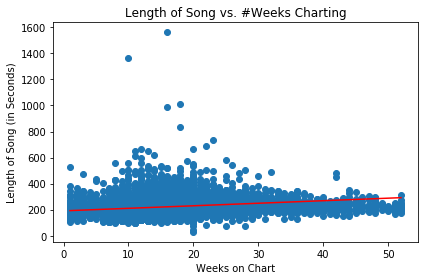

In [17]:
x_axis = time_df["Weeks on Chart"]
y_axis = time_df["Length"]

plt.scatter(x_axis, y_axis)
plt.xlabel("Weeks on Chart")
plt.ylabel("Length of Song (in Seconds)")
plt.title("Length of Song vs. #Weeks Charting")
regress(x_axis, y_axis)
plt.tight_layout()
plt.savefig("Images/LenvsChart.png")

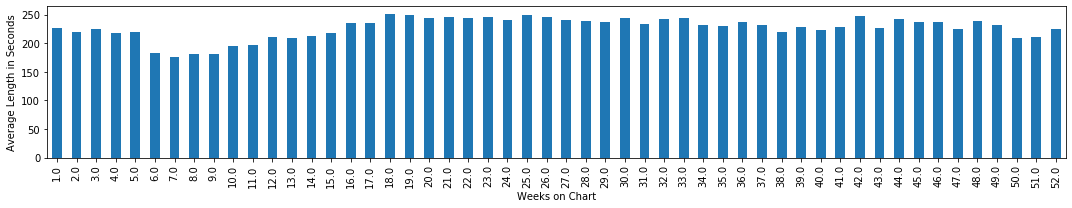

In [18]:
time_df2 = time_df.groupby(["Weeks on Chart"])
avg3 = time_df2["Length"].mean()

timechart = avg3.plot(kind="bar", figsize=(15,3))
timechart.set_xlabel("Weeks on Chart")
timechart.set_ylabel("Average Length in Seconds")
plt.tight_layout()
plt.savefig("Images/LenvsChartBar.png")

The r-squared is: 0.000475
The regression line is: y = -0.08x + 121.31


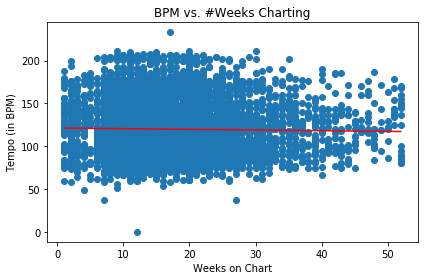

In [19]:
x_axis = time_df["Weeks on Chart"]
y_axis = time_df["Tempo"]

plt.scatter(x_axis, y_axis)
plt.xlabel("Weeks on Chart")
plt.ylabel("Tempo (in BPM)")
plt.title("BPM vs. #Weeks Charting")
regress(x_axis, y_axis)
plt.tight_layout()
plt.savefig("Images/bpmvsChart.png")

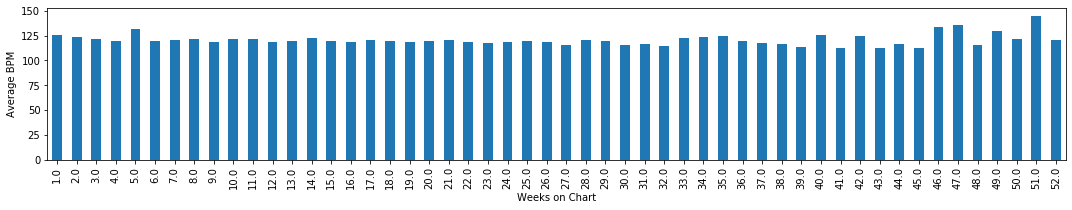

In [20]:
avg4 = time_df2["Tempo"].mean()

timechart2 = avg4.plot(kind="bar", figsize=(15,3))
timechart2.set_xlabel("Weeks on Chart")
timechart2.set_ylabel("Average BPM")
plt.tight_layout()
plt.savefig("Images/bpmvsChartBar.png")

In [21]:
# take the max weeks a song is on the top 40 and show the highest rankers
#loud_ranking = loud_ranking_max.sort_values("Weeks on Chart", ascending=False).dropna(subset=['Weeks on Chart'])
#loud_ranking
#loud_barchart = loud_ranking.plot(kind='bar')
#loud_barchart.set_xlabel('Loudness Category')
#loud_barchart.set_ylabel('Weeks on Chart')
#plt.show()

#test_df = time_df.groupby([["Song", "Length"]], as_index=False)

#testchart = test_df.plot(kind="bar")

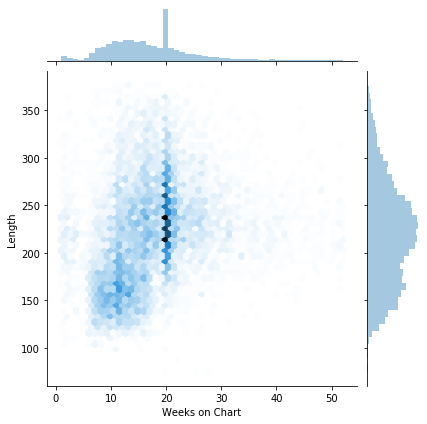

In [22]:
time2_df = time_df
time2_df = time2_df.loc[(time2_df["Length"] < 377) & (time2_df["Length"] > 61)]
time2_df = time2_df.loc[(time2_df["Tempo"] > 48) & (time2_df["Tempo"] < 188)]
time2_df = time2_df.loc[(time2_df["Weeks on Chart"] <= 52)]

x = time2_df["Weeks on Chart"]
y = time2_df["Length"]

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

#plt.imshow(heatmap.T, extent=extent, origin='lower')
sns.jointplot(x="Weeks on Chart", y="Length", data=time2_df, kind="hex")
plt.savefig("Images/LenvsChartheatmap.png")

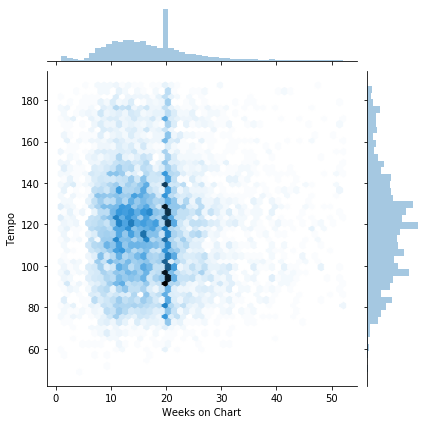

In [23]:
x = time2_df["Weeks on Chart"]
y = time2_df["Tempo"]

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

#plt.imshow(heatmap.T, extent=extent, origin='lower')
sns.jointplot(x="Weeks on Chart", y="Tempo", data=time2_df, kind="hex")
plt.savefig("Images/BPMvsChartheatmap.png")

In [66]:
compare_df = new_df.sort_values(by="Peak Position")
compare_df = compare_df.drop_duplicates(["Song"], keep="first")
    
compare_df["Length"] = compare_df["Length"].apply(convert)
compare_df["Tempo"] = compare_df["Tempo"].apply(rounding)

compare_df = compare_df.loc[(compare_df["Peak Position"] <= 40)]
compare_df = compare_df.loc[(compare_df["Length"] > 57) & (compare_df["Length"] < 377)]
compare_df = compare_df.loc[(compare_df["Tempo"] > 47) & (compare_df["Tempo"] < 187)]

The r-squared is: 0.000481
The regression line is: y = -0.01x + 121.0


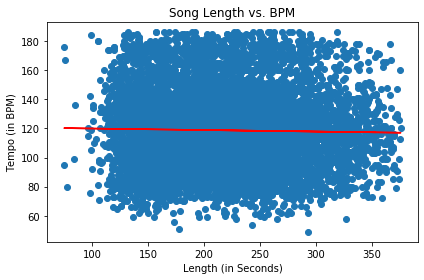

In [67]:
x_axis = compare_df["Length"]
y_axis = compare_df["Tempo"]

plt.scatter(x_axis, y_axis)
plt.xlabel("Length (in Seconds)")
plt.ylabel("Tempo (in BPM)")
plt.title("Song Length vs. BPM")
regress(x_axis, y_axis)
plt.tight_layout()
plt.savefig("Images/LenvsBPM.png")

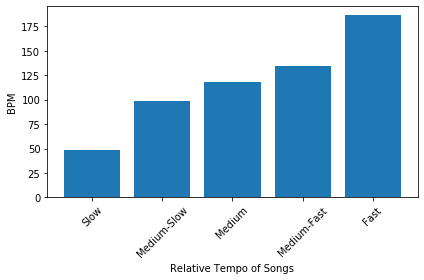

In [81]:
#tempo min: 0, max: 241, 25: 99, 50: 119, 75: 136- for bin reference

quartiles = compare_df["Tempo"].quantile([0, 0.25, 0.5, 0.75, 1])
lowest = round(quartiles[0],2)
lower = round(quartiles[0.25],2)
middle = round(quartiles[0.5],2)
higher = round(quartiles[0.75],2)
highest = round(quartiles[1],2)

tempos = [lowest, lower, middle, higher, highest]

x_axis = np.arange(len(tempos))
ticklocations = [value for value in x_axis]

#avg5 = compare_df2["Length"].mean()

plt.bar(x_axis, tempos, align="center")
plt.xticks(ticklocations, ["Slow", "Medium-Slow", "Medium", "Medium-Fast", "Fast"], rotation=45)
plt.xlabel("Relative Tempo of Songs")
plt.ylabel("BPM")
plt.tight_layout()
plt.savefig("Images/BPMCategories.png")

In [82]:
compare_df.describe()

,Length,Tempo,Week Position,Peak Position,Weeks on Chart
count,9672.000000,9672.000000,9672.000000,9672.000000,9672.000000
mean,219.121071,118.722188,35.164599,16.308623,12.980666
std,54.411026,25.745785,25.804055,12.017048,6.532211
min,75.000000,49.000000,1.000000,1.000000,1.000000
25%,177.000000,99.000000,15.000000,5.000000,9.000000
50%,219.000000,118.000000,31.000000,14.000000,12.000000
75%,255.000000,134.000000,48.000000,26.000000,16.000000
max,376.000000,186.000000,100.000000,40.000000,84.000000


In [83]:
tempos

[49.0, 99.0, 118.0, 134.0, 186.0]

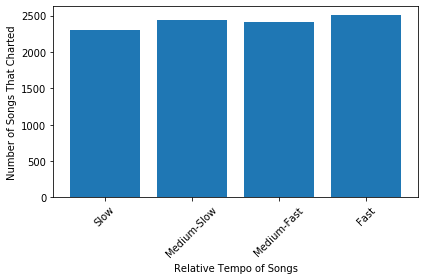

In [84]:
num1 = compare_df.loc[(compare_df["Tempo"] >= 49.0) & (compare_df["Tempo"] < 99.0)]
number1 = num1["Song"].count()

num2 = compare_df.loc[(compare_df["Tempo"] >= 99.0) & (compare_df["Tempo"] < 118.0)]
number2 = num2["Song"].count()

num3 = compare_df.loc[(compare_df["Tempo"] >= 118.0) & (compare_df["Tempo"] < 134.0)]
number3 = num3["Song"].count()

num4 = compare_df.loc[(compare_df["Tempo"] >= 134.0) & (compare_df["Tempo"] < 376.0)]
number4 = num4["Song"].count()

numbers = [number1, number2, number3, number4]
x_axis = [1,2,3,4]

plt.bar(x_axis, numbers, align="center")
plt.xticks([1,2,3,4], ["Slow", "Medium-Slow", "Medium-Fast", "Fast"], rotation=45)
plt.xlabel("Relative Tempo of Songs")
plt.ylabel("Number of Songs That Charted")
plt.tight_layout()
plt.savefig("Images/BPMCategoriesperSong.png")

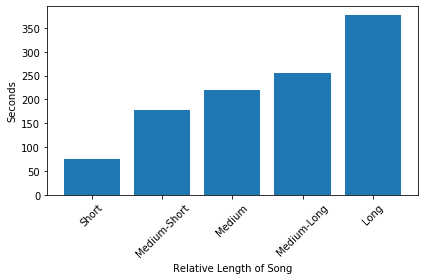

In [70]:
quartiles = compare_df["Length"].quantile([0, 0.25, 0.5, 0.75, 1])
lowest = round(quartiles[0],2)
lower = round(quartiles[0.25],2)
middle = round(quartiles[0.5],2)
higher = round(quartiles[0.75],2)
highest = round(quartiles[1],2)

lengths = [lowest, lower, middle, higher, highest]

x_axis = np.arange(len(lengths))
ticklocations = [value for value in x_axis]

plt.bar(x_axis, lengths, align="center")
plt.xticks(ticklocations, ["Short", "Medium-Short", "Medium", "Medium-Long", "Long"], rotation=45)
plt.xlabel("Relative Length of Song")
plt.ylabel("Seconds")
plt.tight_layout()
plt.savefig("Images/LenCategories.png")

In [85]:
lengths

[75.0, 177.0, 219.0, 255.0, 376.0]

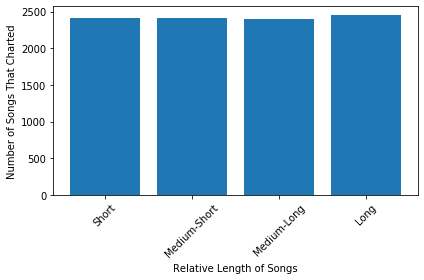

In [86]:
num5 = compare_df.loc[(compare_df["Length"] >= 75.0) & (compare_df["Length"] < 177.0)]
number5 = num5["Song"].count()

num6 = compare_df.loc[(compare_df["Length"] >= 177.0) & (compare_df["Length"] < 219.0)]
number6 = num6["Song"].count()

num7 = compare_df.loc[(compare_df["Length"] >= 219.0) & (compare_df["Length"] < 255.0)]
number7 = num7["Song"].count()

num8 = compare_df.loc[(compare_df["Length"] >= 255.0) & (compare_df["Length"] < 376.0)]
number8 = num8["Song"].count()

numbers2 = [number5, number6, number7, number8]
x_axis = [1,2,3,4]

plt.bar(x_axis, numbers2, align="center")
plt.xticks([1,2,3,4], ["Short", "Medium-Short", "Medium-Long", "Long"], rotation=45)
plt.xlabel("Relative Length of Songs")
plt.ylabel("Number of Songs That Charted")
plt.tight_layout()
plt.savefig("Images/LenCategoriesperSong.png")

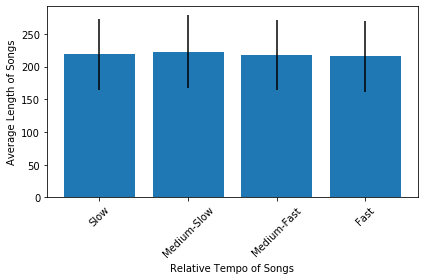

In [72]:
num9 = compare_df.loc[(compare_df["Tempo"] >= 58.0) & (compare_df["Tempo"] < 98.0)]
number9 = num9["Length"].mean()
std9 = num9["Length"].std()

num10 = compare_df.loc[(compare_df["Tempo"] >= 98.0) & (compare_df["Tempo"] < 121.0)]
number10 = num10["Length"].mean()
std10 = num10["Length"].std()

num11 = compare_df.loc[(compare_df["Tempo"] >= 121.0) & (compare_df["Tempo"] < 140.0)]
number11 = num11["Length"].mean()
std11 = num11["Length"].std()

num12 = compare_df.loc[(compare_df["Tempo"] >= 140.0) & (compare_df["Tempo"] < 206.0)]
number12 = num12["Length"].mean()
std12 = num12["Length"].std()

numbers3 = [number9, number10, number11, number12]
error3 = [std9, std10, std11, std12]
x_axis = [1,2,3,4]

plt.bar(x_axis, numbers3, yerr=error3, align="center")
plt.xticks([1,2,3,4], ["Slow", "Medium-Slow", "Medium-Fast", "Fast"], rotation=45)
plt.xlabel("Relative Tempo of Songs")
plt.ylabel("Average Length of Songs")
plt.tight_layout()
plt.savefig("Images/BPMCategoriesperLen.png")

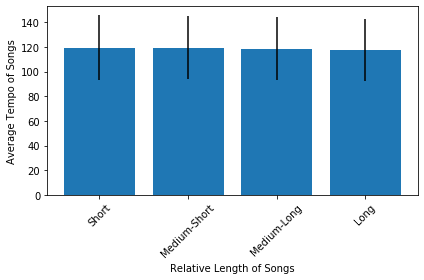

In [73]:
num13 = compare_df.loc[(compare_df["Length"] >= 96.0) & (compare_df["Length"] < 201.0)]
number13 = num13["Tempo"].mean()
std13 = num13["Tempo"].std()

num14 = compare_df.loc[(compare_df["Length"] >= 201.0) & (compare_df["Length"] < 230.0)]
number14 = num14["Tempo"].mean()
std14 = num14["Tempo"].std()

num15 = compare_df.loc[(compare_df["Length"] >= 230.0) & (compare_df["Length"] < 264.0)]
number15 = num15["Tempo"].mean()
std15 = num15["Tempo"].std()

num16 = compare_df.loc[(compare_df["Length"] >= 264.0) & (compare_df["Length"] < 536.0)]
number16 = num16["Tempo"].mean()
std16 = num16["Tempo"].std()

numbers4 = [number13, number14, number15, number16]
error4 = [std13, std14, std15, std16]
x_axis = [1,2,3,4]

plt.bar(x_axis, numbers4, yerr=error4, align="center")
plt.xticks([1,2,3,4], ["Short", "Medium-Short", "Medium-Long", "Long"], rotation=45)
plt.xlabel("Relative Length of Songs")
plt.ylabel("Average Tempo of Songs")
plt.tight_layout()
plt.savefig("Images/LenCategoriesperBPM.png")

In [76]:
compare2_df = new_df.sort_values(by="Peak Position")
compare2_df = compare2_df.drop_duplicates(["Song"], keep="first")
    
compare2_df["Length"] = compare2_df["Length"].apply(convert)
compare2_df["Tempo"] = compare2_df["Tempo"].apply(rounding)

compare2_df = compare2_df.loc[(compare2_df["Length"] > 57) & (compare2_df["Length"] < 377)]
compare2_df = compare2_df.loc[(compare2_df["Tempo"] > 47) & (compare2_df["Tempo"] < 187)]

compare2_df = compare2_df.loc[(compare2_df["Peak Position"] <= 40)]
compare2_df

,Song,Length,Tempo,Date,Week Position,Peak Position,Weeks on Chart
Performer,,,,,,,
Exile,Kiss You All Over,214.0,102.0,12/2/1978,45.0,1.0,22.0
Commodores,Still,225.0,124.0,12/8/1979,3.0,1.0,11.0
The Notorious B.I.G. Featuring Puff Daddy & Mase,Mo Money Mo Problems,257.0,105.0,12/13/1997,26.0,1.0,20.0
Ashanti,Foolish,227.0,89.0,9/21/2002,49.0,1.0,32.0
Justin Bieber,Love Yourself,234.0,103.0,5/28/2016,11.0,1.0,26.0
...,...,...,...,...,...,...,...
Post Malone,92 Explorer,211.0,146.0,5/12/2018,40.0,40.0,1.0
Elvis Presley,Blue Christmas,129.0,95.0,1/5/2019,40.0,40.0,1.0
Elvis Presley,Until It's Time For You To Go,238.0,90.0,3/11/1972,40.0,40.0,7.0


In [77]:
compare2_df = compare2_df.set_index(["Song"])
compare2_df = compare2_df[["Length", "Tempo"]]
compare2_df

,Length,Tempo
Song,,
Kiss You All Over,214.0,102.0
Still,225.0,124.0
Mo Money Mo Problems,257.0,105.0
Foolish,227.0,89.0
Love Yourself,234.0,103.0
...,...,...
92 Explorer,211.0,146.0
Blue Christmas,129.0,95.0
Until It's Time For You To Go,238.0,90.0


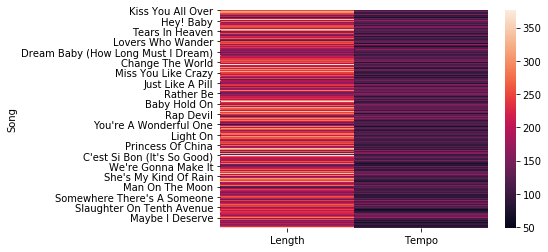

In [78]:
sns.heatmap(compare2_df)

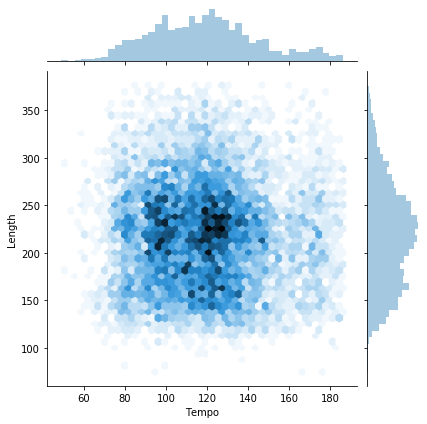

In [79]:

x = compare2_df["Tempo"]
y = compare2_df["Length"]

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

#plt.imshow(heatmap.T, extent=extent, origin='lower')
sns.jointplot(x="Tempo", y="Length", data=compare2_df, kind="hex")
plt.savefig("Images/LenvsBPMheatmap.png")

In [80]:
compare3_df = new_df.sort_values(by="Weeks on Chart")
compare3_df = compare3_df.drop_duplicates(["Song"], keep="last")
    
compare3_df["Length"] = compare3_df["Length"].apply(convert)
compare3_df["Tempo"] = compare3_df["Tempo"].apply(rounding)

compare3_df = compare3_df.loc[(compare3_df["Peak Position"] <= 40)]
compare3_df = compare3_df.loc[(compare3_df["Length"] < 377) & (compare3_df["Length"] > 61)]
compare3_df = compare3_df.loc[(compare3_df["Tempo"] > 48) & (compare3_df["Tempo"] < 188)]
compare3_df

,Song,Length,Tempo,Date,Week Position,Peak Position,Weeks on Chart
Performer,,,,,,,
Glee Cast,Blackbird,140.0,93.0,4/2/2011,37.0,37.0,1.0
Ed Sheeran,Afire Love,314.0,98.0,7/5/2014,37.0,37.0,1.0
Glee Cast,Sweet Caroline,118.0,124.0,11/7/2009,34.0,34.0,1.0
Taylor Swift,Sweeter Than Fiction,238.0,135.0,11/9/2013,34.0,34.0,1.0
J. Cole,She's Mine Pt. 2,209.0,140.0,12/31/2016,34.0,34.0,1.0
...,...,...,...,...,...,...,...
OneRepublic,Counting Stars,258.0,122.0,10/18/2014,50.0,2.0,68.0
LeAnn Rimes,How Do I Live,267.0,128.0,10/10/1998,45.0,2.0,69.0
Jason Mraz,I'm Yours,242.0,151.0,10/10/2009,48.0,6.0,76.0


In [40]:
iqr1 = (258 - 179)
lower1 = 179 - (1.5*iqr1)
upper1 = 258 + (1.5*iqr1)

print(f"{lower1} {upper1}")

iqr2 = (135 - 100)
lower2 = 100 - (1.5*iqr2)
upper2 = 135 + (1.5*iqr2)

print(f"{lower2} {upper2}")

60.5 376.5
47.5 187.5


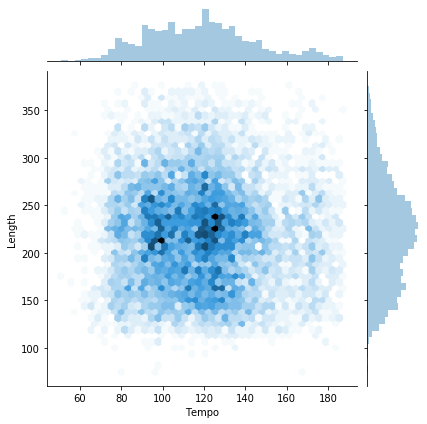

In [41]:
x = compare3_df["Tempo"]
y = compare3_df["Length"]

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

sns.jointplot(x="Tempo", y="Length", data=compare3_df, kind="hex")
plt.savefig("Images/LenvsBPMheatmap2.png")

In [42]:
date_df = new_df.sort_values(by="Peak Position")
date_df = date_df.drop_duplicates(["Song"], keep="last")

date_df["Date"] = pd.to_datetime(date_df["Date"])
    
date_df["Length"] = date_df["Length"].apply(convert)
date_df["Tempo"] = date_df["Tempo"].apply(rounding)

date_df = date_df.loc[(date_df["Peak Position"] <= 40)]

date_df = date_df.sort_values(by="Date") 

In [43]:
chdf = new_df.sort_values(by="Peak Position")
chdf = chdf.drop_duplicates(["Song"], keep="last")

chdf["Length"] = chdf["Length"].apply(convert)
chdf["Tempo"] = chdf["Tempo"].apply(rounding)

chartdf1 = chdf.loc[(chdf["Peak Position"] <= 40)]
chartdf2 = chdf.loc[(chdf["Peak Position"] > 40)]

In [44]:
mean1 = chartdf1["Length"].mean()
mean2 = chartdf1["Tempo"].mean()
mean3 = chartdf2["Length"].mean()
mean4 = chartdf2["Tempo"].mean()

print(f"{mean1} {mean3} {mean2} {mean4}")

235.49329758713137 220.97893065113817 121.50804289544236 120.28067760719958


In [45]:
stats.ttest_ind(chartdf1["Length"], chartdf2["Length"], equal_var=False)

Ttest_indResult(statistic=6.8410802000351625, pvalue=1.517912942874552e-11)

In [46]:
stats.ttest_ind(chartdf1["Tempo"], chartdf2["Tempo"], equal_var=False)

Ttest_indResult(statistic=1.152177417296196, pvalue=0.2495912389713527)